# Slovakia EDA

# Predicting the number of active cases in Slovakia.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Reading CSV File
df=pd.read_csv(r'C:\Users\DELL\Downloads\linear-comprehensive-covid-data.csv')

#pandas- allows easy manipulation of data structures
#NumPy- allows scientific computing
#sklearn- A machine learning library for python
#Matplotlib -is a library for creating static, animated, and interactive visualizations in Python.
#Seaborn -is a data visualization library in Python based on matplotlib.
#NumPy- allows scientific computing

In [112]:
#Basic Data Analysis

In [113]:
df.head()
#basic data analysis,quick view of data set
#showes first five rows of the data set

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [114]:
df.shape

(74866, 59)

In [115]:
df.info()
#Summary of data frame, including the index datatype and column dtypes, non-null values and memory usage
#This method prints information about a DataFrame including the index dtype and column dtypes,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

# Slovakia - EDA

Exploratory data analysis for the country Slovakia. From covid 19 world dataset (df)Select data where location=Slovakia

In [116]:
df_slovakia=df[(df['location']=='Slovakia')]

In [117]:
print("The shape of the data frame is", (df_slovakia.shape))
print("The columns of the data frame are" , (df_slovakia.columns))

The shape of the data frame is (374, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vac

In [118]:
df_slovakia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [119]:
#sort Slovakia data set (sort() method sorts the list ascending by default)
df_slovakia=df_slovakia.reindex(sorted(df_slovakia.columns), axis=1)
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   aged_65_older                          374 non-null    float64
 1   aged_70_older                          374 non-null    float64
 2   cardiovasc_death_rate                  374 non-null    float64
 3   continent                              374 non-null    object 
 4   date                                   374 non-null    object 
 5   diabetes_prevalence                    374 non-null    float64
 6   extreme_poverty                        374 non-null    float64
 7   female_smokers                         374 non-null    float64
 8   gdp_per_capita                         374 non-null    float64
 9   handwashing_facilities                 0 non-null      float64
 10  hosp_patients                          312 non-null    float64
 11  

# Number of missing values per column.

In [120]:
# number of missing value per column
df_slovakia.isnull().sum()

aged_65_older                              0
aged_70_older                              0
cardiovasc_death_rate                      0
continent                                  0
date                                       0
diabetes_prevalence                        0
extreme_poverty                            0
female_smokers                             0
gdp_per_capita                             0
handwashing_facilities                   374
hosp_patients                             62
hosp_patients_per_million                 62
hospital_beds_per_thousand                 0
human_development_index                    0
icu_patients                             374
icu_patients_per_million                 374
iso_code                                   0
life_expectancy                            0
location                                   0
male_smokers                               0
median_age                                 0
new_cases                                  0
new_cases_

# Remove unnecessary columns,columns having lot of missing values,and columns having duplicate name

In [121]:
df_slovakia.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','new_vaccinations','new_vaccinations_smoothed',
                  'location','iso_code','continent','location','new_vaccinations_smoothed_per_million','people_fully_vaccinated','people_fully_vaccinated_per_hundred',
                    'people_vaccinated','people_vaccinated_per_hundred','weekly_icu_admissions_per_million','weekly_icu_admissions','weekly_hosp_admissions_per_million',
                  'weekly_hosp_admissions','total_vaccinations','total_vaccinations_per_hundred','continent','iso_code'],axis=1, inplace=True)

In [122]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    374 non-null    float64
 1   aged_70_older                    374 non-null    float64
 2   cardiovasc_death_rate            374 non-null    float64
 3   date                             374 non-null    object 
 4   diabetes_prevalence              374 non-null    float64
 5   extreme_poverty                  374 non-null    float64
 6   female_smokers                   374 non-null    float64
 7   gdp_per_capita                   374 non-null    float64
 8   hosp_patients                    312 non-null    float64
 9   hosp_patients_per_million        312 non-null    float64
 10  hospital_beds_per_thousand       374 non-null    float64
 11  human_development_index          374 non-null    float64
 12  life_expectancy 

In [123]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date']) 
df_slovakia.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,hosp_patients,hosp_patients_per_million,...,reproduction_rate,stringency_index,tests_per_case,tests_units,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand
60393,15.07,9.167,287.959,2020-03-06,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,1.0,0.183,NaN,NaN,378.0,0.069
60394,15.07,9.167,287.959,2020-03-07,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,1.0,0.183,NaN,NaN,444.0,0.081
60395,15.07,9.167,287.959,2020-03-08,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,3.0,0.549,NaN,NaN,520.0,0.095
60396,15.07,9.167,287.959,2020-03-09,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,22.22,NaN,tests performed,3.0,0.549,NaN,NaN,589.0,0.108
60397,15.07,9.167,287.959,2020-03-10,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,33.33,NaN,tests performed,7.0,1.282,NaN,NaN,700.0,0.128


In [124]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    374 non-null    float64       
 1   aged_70_older                    374 non-null    float64       
 2   cardiovasc_death_rate            374 non-null    float64       
 3   date                             374 non-null    datetime64[ns]
 4   diabetes_prevalence              374 non-null    float64       
 5   extreme_poverty                  374 non-null    float64       
 6   female_smokers                   374 non-null    float64       
 7   gdp_per_capita                   374 non-null    float64       
 8   hosp_patients                    312 non-null    float64       
 9   hosp_patients_per_million        312 non-null    float64       
 10  hospital_beds_per_thousand       374 non-null    float64

# change object data type to numeric data type

In [125]:
#convertstring date to date-time
#date-time fromat to numeric

In [126]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date']) 


In [127]:
#date-time fromat to numeric dqta type
df_slovakia['date'] = pd.to_numeric(df_slovakia['date'])

change "test_units"object to numeric data type

In [128]:
df_slovakia["tests_units"].value_counts()

tests performed    373
Name: tests_units, dtype: int64

In [129]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_slovakia['tests_units'])

In [130]:
## add "test_performed" to df_slovakia data frame
df_slovakia = pd.concat([df_slovakia,test_performed], axis=1)

In [131]:
#drop "tests_units"
df_slovakia.drop(['tests_units'],axis=1,inplace=True)

In [132]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    374 non-null    float64
 1   aged_70_older                    374 non-null    float64
 2   cardiovasc_death_rate            374 non-null    float64
 3   date                             374 non-null    int64  
 4   diabetes_prevalence              374 non-null    float64
 5   extreme_poverty                  374 non-null    float64
 6   female_smokers                   374 non-null    float64
 7   gdp_per_capita                   374 non-null    float64
 8   hosp_patients                    312 non-null    float64
 9   hosp_patients_per_million        312 non-null    float64
 10  hospital_beds_per_thousand       374 non-null    float64
 11  human_development_index          374 non-null    float64
 12  life_expectancy 

# Data Analysis

# Univariate analysis and Imputation

In [133]:
print(df_slovakia.isnull().values.sum())

309


In [134]:
df_slovakia.isnull().sum()

aged_65_older                       0
aged_70_older                       0
cardiovasc_death_rate               0
date                                0
diabetes_prevalence                 0
extreme_poverty                     0
female_smokers                      0
gdp_per_capita                      0
hosp_patients                      62
hosp_patients_per_million          62
hospital_beds_per_thousand          0
human_development_index             0
life_expectancy                     0
male_smokers                        0
median_age                          0
new_cases                           0
new_cases_per_million               0
new_cases_smoothed                  5
new_cases_smoothed_per_million      5
new_deaths                         26
new_deaths_per_million             26
new_deaths_smoothed                 5
new_deaths_smoothed_per_million     5
new_tests                           1
new_tests_per_thousand              1
new_tests_smoothed                  8
new_tests_sm

Text(0.5, 1.0, 'Histogram of hosp_patients_per_million')

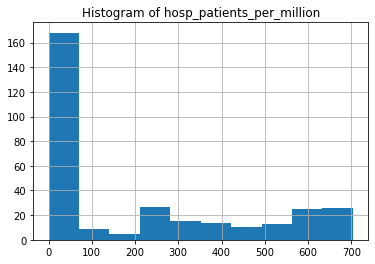

In [135]:
#hosp_patients_per_million
df_slovakia.hosp_patients_per_million.hist()
plt.plot()
plt.title('Histogram of hosp_patients_per_million')

graph data is not normally distributed and it is right skewed, repalce missing value of "hosp_patients" with median value

In [136]:
#repalce missing value of " hosp_patients" with median value,
df_slovakia["hosp_patients"].fillna(df_slovakia["hosp_patients"].median(), inplace = True)
df_slovakia["hosp_patients_per_million"].fillna(df_slovakia["hosp_patients_per_million"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_cases_smoothed')

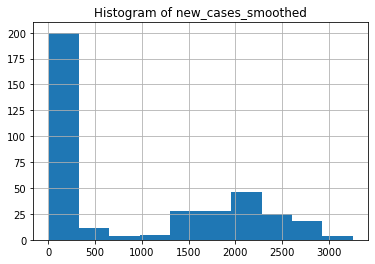

In [137]:
#new_cases_smoothed
df_slovakia.new_cases_smoothed.hist()
plt.plot()
plt.title('Histogram of new_cases_smoothed')

graph data is not normally distributed and it is right skewed, repalce missing value of "new_cases_smoothed" with median value

In [138]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_cases_smoothed_per_million"].fillna(df_slovakia["new_cases_smoothed_per_million"].median(), inplace = True)
df_slovakia["new_cases_smoothed"].fillna(df_slovakia["new_cases_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_deaths')

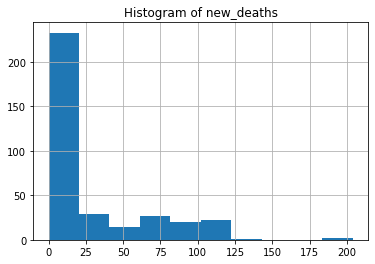

In [139]:
#new_deaths_per_million
df_slovakia.new_deaths.hist()
plt.plot()
plt.title('Histogram of new_deaths')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [140]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_deaths_per_million"].fillna(df_slovakia["new_deaths_per_million"].median(), inplace = True)
df_slovakia["new_deaths"].fillna(df_slovakia["new_deaths"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_deaths_smoothed_per_million')

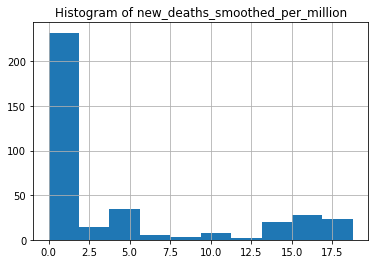

In [141]:
#new_deaths_per_million
df_slovakia.new_deaths_smoothed_per_million.hist()
plt.plot()
plt.title('Histogram of new_deaths_smoothed_per_million')

graph data is not normally distributed and it is right skewed, repalce missing value  median value

In [142]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_deaths_smoothed_per_million"].fillna(df_slovakia["new_deaths_smoothed_per_million"].median(), inplace = True)
df_slovakia["new_deaths_smoothed"].fillna(df_slovakia["new_deaths_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests')

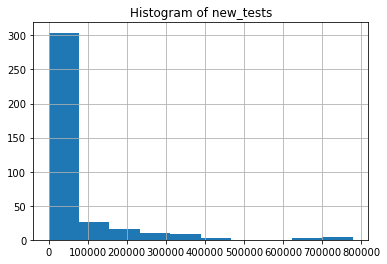

In [143]:
#new_deaths_per_million
df_slovakia.new_tests.hist()
plt.plot()
plt.title('Histogram of new_tests')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [144]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_tests_per_thousand"].fillna(df_slovakia["new_tests_per_thousand"].median(), inplace = True)
df_slovakia["new_tests"].fillna(df_slovakia["new_tests"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests_smoothed_per_thousand')

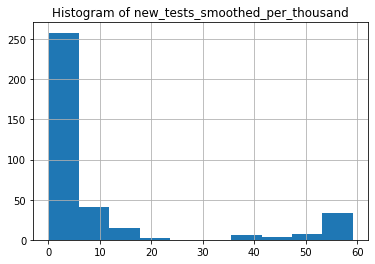

In [145]:
#new_tests_smoothed_per_thousand
df_slovakia.new_tests_smoothed_per_thousand.hist()
plt.plot()
plt.title('Histogram of new_tests_smoothed_per_thousand')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [146]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_tests_smoothed_per_thousand"].fillna(df_slovakia["new_tests_smoothed_per_thousand"].median(), inplace = True)
df_slovakia["new_tests_smoothed"].fillna(df_slovakia["new_tests_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of positive_rate')

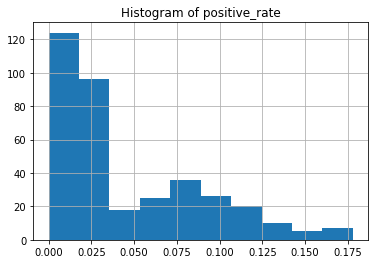

In [147]:
#positive_rate
df_slovakia.positive_rate.hist()
plt.plot()
plt.title('Histogram of positive_rate')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [148]:
df_slovakia["positive_rate"].fillna(df_slovakia["positive_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of reproduction_rate')

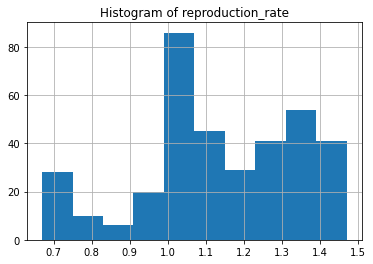

In [149]:
#reproduction_rate
df_slovakia.reproduction_rate.hist()
plt.plot()
plt.title('Histogram of reproduction_rate')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [150]:
df_slovakia["reproduction_rate"].fillna(df_slovakia["reproduction_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of stringency_index')

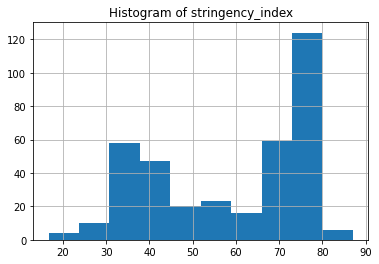

In [151]:
#stringency_index
df_slovakia.stringency_index.hist()
plt.plot()
plt.title('Histogram of stringency_index')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [152]:
df_slovakia["stringency_index"].fillna(df_slovakia["stringency_index"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of tests_per_case')

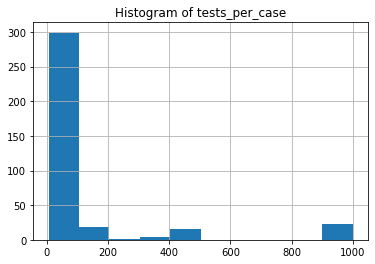

In [153]:
#stringency_index
df_slovakia.tests_per_case.hist()
plt.plot()
plt.title('Histogram of tests_per_case')

In [154]:
df_slovakia["tests_per_case"].fillna(df_slovakia["tests_per_case"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of total_deaths')

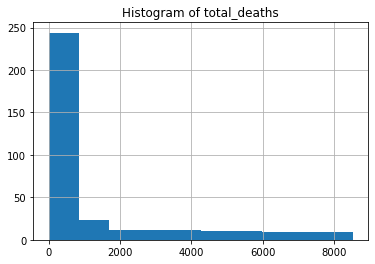

In [155]:
#total_deaths_per_million
df_slovakia.total_deaths.hist()
plt.plot()
plt.title('Histogram of total_deaths')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [156]:
df_slovakia["total_deaths"].fillna(df_slovakia["total_deaths"].median(), inplace = True)
df_slovakia["total_deaths_per_million"].fillna(df_slovakia["total_deaths_per_million"].median(), inplace = True)


Text(0.5, 1.0, 'Histogram of total_tests_per_thousand')

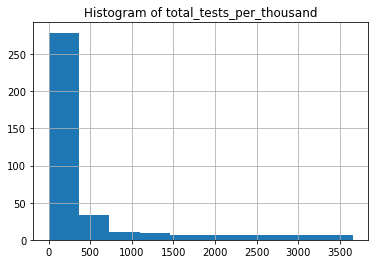

In [157]:
#total_tests_per_thousand
df_slovakia.total_tests_per_thousand.hist()
plt.plot()
plt.title('Histogram of total_tests_per_thousand')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [158]:
df_slovakia["total_tests_per_thousand"].fillna(df_slovakia["total_tests_per_thousand"].median(), inplace = True)
df_slovakia["total_tests"].fillna(df_slovakia["total_tests"].median(), inplace = True)

In [159]:
print(df_slovakia.isnull().values.sum())

0


# Bivariate analysis

Bivariate analysis and Features selection

Text(0.5, 1.0, 'hosp_patients vs hosp_patients_per_million')

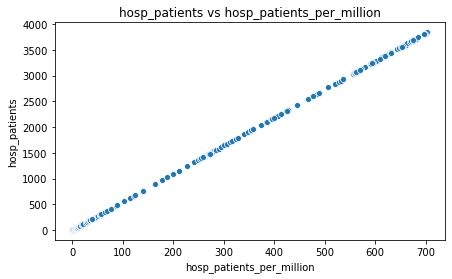

In [160]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['hosp_patients_per_million'], y=df_slovakia["hosp_patients"])
plt.title('hosp_patients vs hosp_patients_per_million')

select one feature for model development,they are identical

Text(0.5, 1.0, 'new_cases vs new_cases_per_million')

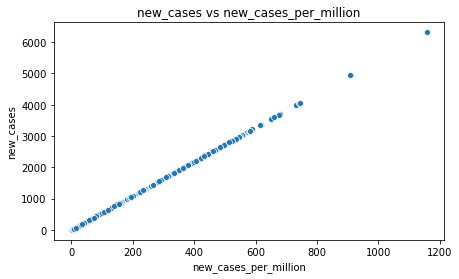

In [161]:
#new_cases_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_per_million'], y=df_slovakia["new_cases"])
plt.title('new_cases vs new_cases_per_million')

select one feature for model development,they are identical

Text(0.5, 1.0, 'new_cases_smoothed vs new_cases_smoothed_per_million')

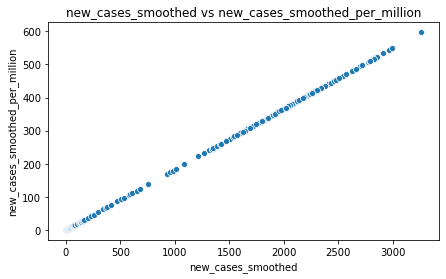

In [162]:
#new_cases_smoothed                  
#new_cases_smoothed_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_smoothed'], y=df_slovakia["new_cases_smoothed_per_million"])
plt.title('new_cases_smoothed vs new_cases_smoothed_per_million')

take one feature to predict the model,drop other

Text(0.5, 1.0, 'total_tests_per_thousand vs total_tests')

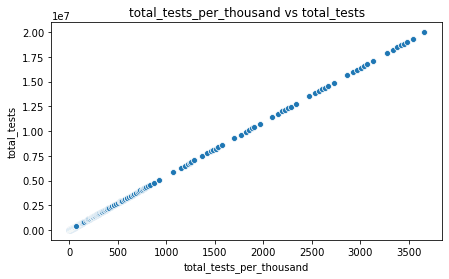

In [163]:
#total_tests                         1
#total_tests_per_thousand
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_tests_per_thousand'], y=df_slovakia["total_tests"])
plt.title('total_tests_per_thousand vs total_tests')

Text(0.5, 1.0, 'total_deaths_per_million vs total_deaths')

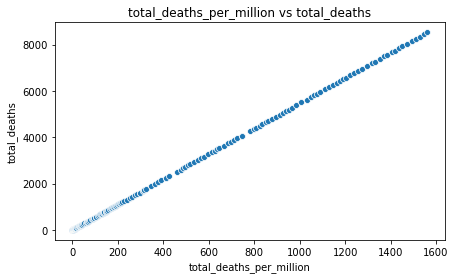

In [164]:
#total_deaths                       
#total_deaths_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_deaths_per_million'], y=df_slovakia["total_deaths"])
plt.title('total_deaths_per_million vs total_deaths')

Text(0.5, 1.0, 'total_cases_per_million vs total_cases')

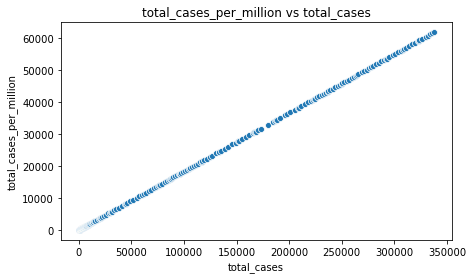

In [165]:
#total_cases                         
#total_cases_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_cases'], y=df_slovakia["total_cases_per_million"])
plt.title('total_cases_per_million vs total_cases')

fronm the above graphs both features are  identical so take one feature to predict the model

In [166]:
df_slovakia.drop(['new_cases_smoothed_per_million','new_cases_per_million','hosp_patients_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                 'new_tests_per_thousand','new_tests_smoothed_per_thousand','total_tests_per_thousand','total_deaths_per_million','total_cases_per_million',
                 ],axis=1,inplace=True)

In [167]:
df_slovakia.shape

(374, 30)

In [168]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               374 non-null    float64
 1   aged_70_older               374 non-null    float64
 2   cardiovasc_death_rate       374 non-null    float64
 3   date                        374 non-null    int64  
 4   diabetes_prevalence         374 non-null    float64
 5   extreme_poverty             374 non-null    float64
 6   female_smokers              374 non-null    float64
 7   gdp_per_capita              374 non-null    float64
 8   hosp_patients               374 non-null    float64
 9   hospital_beds_per_thousand  374 non-null    float64
 10  human_development_index     374 non-null    float64
 11  life_expectancy             374 non-null    float64
 12  male_smokers                374 non-null    float64
 13  median_age                  3

# Bivariate analysis with target variable

Text(0.5, 1.0, 'New_cases vs aged_65_older')

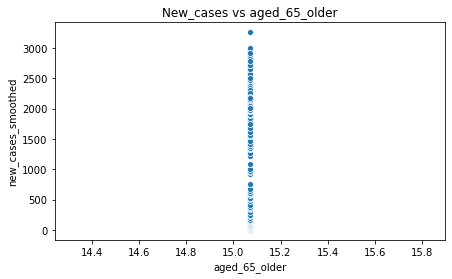

In [169]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['aged_65_older'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs aged_65_older')

from graph we see no relation between two features

Text(0.5, 1.0, 'New_cases vs cardiovasc_death_rate')

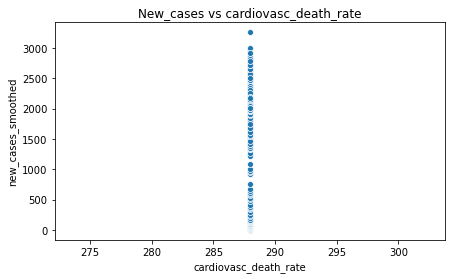

In [170]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['cardiovasc_death_rate'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs cardiovasc_death_rate')

Text(0.5, 1.0, 'New_cases vs cardiovasc_death_rate')

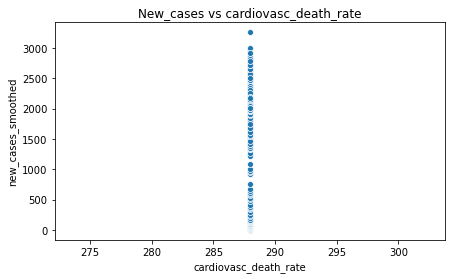

In [171]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['cardiovasc_death_rate'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs cardiovasc_death_rate')

Text(0.5, 1.0, 'New_cases vs date')

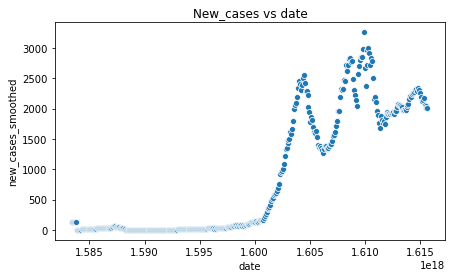

In [172]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['date'], y=df_slovakia['new_cases_smoothed'])
plt.title('New_cases vs date')

In [173]:
(df_slovakia['date']).corr(df_slovakia['new_cases_smoothed'])

0.8630426468061905

both feature are correlated, use for prediction

In [174]:
(df_slovakia['new_cases']).corr(df_slovakia['new_cases_smoothed'])

0.8725859374196675

Text(0.5, 1.0, 'New_cases vs diabetes_prevalence')

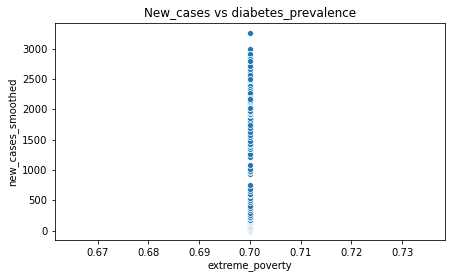

In [175]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['extreme_poverty'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs diabetes_prevalence')

no relation.drop diabetes_prevalence

Text(0.5, 1.0, 'New_cases vs hosp_patients')

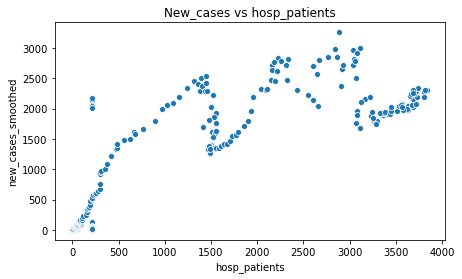

In [176]:
#hosp_patients
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['hosp_patients'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs hosp_patients')

Text(0.5, 1.0, 'New_cases vs hosp_patients')

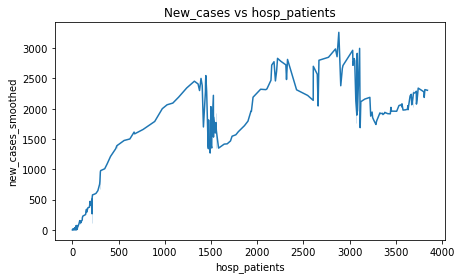

In [177]:
#hosp_patients
plt.figure(figsize=(7,4))
sns.lineplot(x=df_slovakia['hosp_patients'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs hosp_patients')

In [178]:
(df_slovakia['hosp_patients']).corr(df_slovakia['new_cases_smoothed'])

0.8593145448630025

Text(0.5, 1.0, 'new_cases_smoothed vs new_deaths')

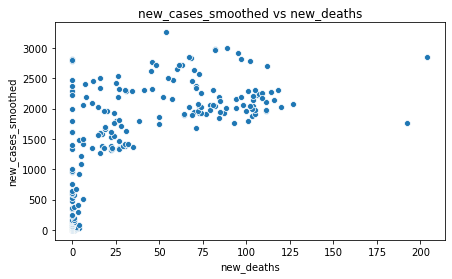

In [179]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs new_deaths')

In [180]:
(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_deaths'])

0.7528493062807917

Text(0.5, 1.0, 'New_cases vs new_deaths')

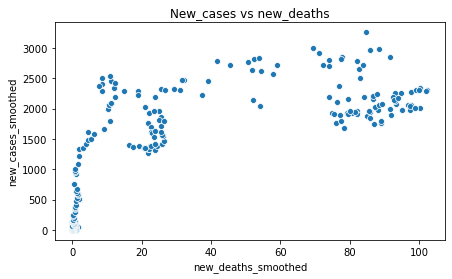

In [181]:
#new_deaths
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths_smoothed'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs new_deaths')

In [182]:
(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_deaths_smoothed'])

0.8054680661446664

Text(0.5, 1.0, 'new_cases_smoothed vs new_tests ')

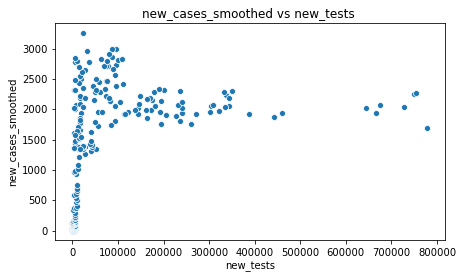

In [183]:
#new_tests
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs new_tests ')

In [184]:
(df_slovakia['new_tests']).corr(df_slovakia['new_cases_smoothed'])

0.4918448305389645

Text(0.5, 1.0, 'new_tests_smoothed vs new_deaths')

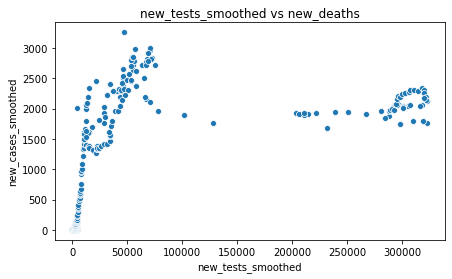

In [185]:
#new_tests_smoothed
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests_smoothed'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_tests_smoothed vs new_deaths')

In [186]:
(df_slovakia['positive_rate']).corr(df_slovakia['new_cases_smoothed'])

0.5682044667794577

In [187]:
(df_slovakia['population']).corr(df_slovakia['new_cases_smoothed'])
#no relation

nan

In [188]:
(df_slovakia['population_density']).corr(df_slovakia['new_cases_smoothed'])
# negative correlation

-5.0812048593317736e-17

In [189]:
#positive_rate
(df_slovakia['positive_rate']).corr(df_slovakia['new_cases_smoothed'])

0.5682044667794577

In [190]:
#stringency_index
(df_slovakia['stringency_index']).corr(df_slovakia['new_cases_smoothed'])
# correlation feature

0.4497758307345464

In [191]:
#tests_per_case
(df_slovakia['tests_per_case']).corr(df_slovakia['new_cases_smoothed'])
#negative correlation

-0.34118198938407857

In [192]:
#total_cases
(df_slovakia['total_cases']).corr(df_slovakia['new_cases_smoothed'])
#negative correlation

0.8313734167362042

In [193]:
#total_deaths
(df_slovakia['total_deaths']).corr(df_slovakia['new_cases_smoothed'])
#positive relation

0.6616370245833613

In [194]:
#total_tests 
(df_slovakia['total_tests']).corr(df_slovakia['new_cases_smoothed'])
# correlated 

0.5999629555221436

Text(0.5, 1.0, 'new_cases_smoothed vs extreme_poverty')

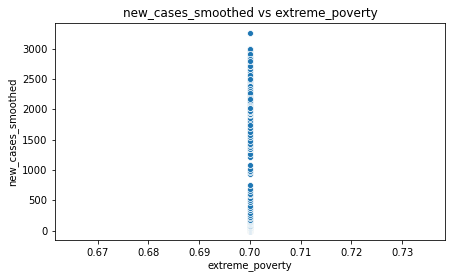

In [195]:
#extreme_poverty
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['extreme_poverty'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs extreme_poverty')

In [196]:
#tests performed
(df_slovakia['extreme_poverty']).corr(df_slovakia['new_cases_smoothed'])
#no relation

1.8101792311369445e-16

In [197]:
(df_slovakia['tests performed']).corr(df_slovakia['new_cases_smoothed'])

-0.057244344442064644

In [198]:
(df_slovakia['hospital_beds_per_thousand']).corr(df_slovakia['new_cases_smoothed'])

1.8101792311369445e-16

if a feature has no relation with target variable(new_cases_smoothed)  remove the feature and take the other feature to predict the model,select the features where corr score more than 60 for prediction.


In [199]:
df_slovakia.drop(['aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','extreme_poverty','female_smokers',
                 'gdp_per_capita','human_development_index','life_expectancy','male_smokers','median_age','population','population_density',
                 'reproduction_rate','tests_per_case','tests performed','hospital_beds_per_thousand',
                  'positive_rate','stringency_index','new_tests','new_tests_smoothed','new_deaths','total_tests'
                 ],axis=1,inplace=True)

In [200]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    int64  
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths_smoothed  374 non-null    float64
 5   total_cases          374 non-null    float64
 6   total_deaths         374 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.4 KB


# # #correlation map

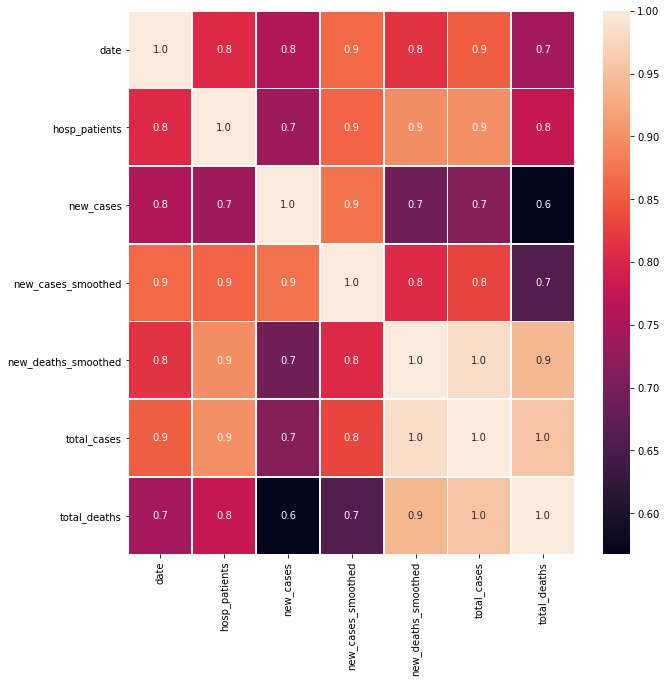

In [201]:
#correlation map
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_slovakia.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [202]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    int64  
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths_smoothed  374 non-null    float64
 5   total_cases          374 non-null    float64
 6   total_deaths         374 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.4 KB


In [203]:
df_slovakia.head()

,date,hosp_patients,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases,total_deaths
60393,1583452800000000000,213.5,1.0,131.143,0.714,1.0,39.5
60394,1583539200000000000,213.5,0.0,131.143,0.714,1.0,39.5
60395,1583625600000000000,213.5,2.0,131.143,0.714,3.0,39.5
60396,1583712000000000000,213.5,0.0,131.143,0.714,3.0,39.5
60397,1583798400000000000,213.5,4.0,131.143,0.714,7.0,39.5


In [204]:
df_slovakia.describe()

,date,hosp_patients,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases,total_deaths
count,3.740000e+02,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,1.599566e+18,981.008021,902.414439,887.367465,22.034773,73280.117647,1203.673797
std,9.340595e+15,1278.005462,1176.685369,1022.355578,34.076695,103901.093482,2186.822792
min,1.583453e+18,0.000000,0.000000,0.857000,0.000000,1.000000,1.000000
25%,1.591510e+18,27.500000,14.000000,18.749750,0.000000,1528.500000,28.000000
50%,1.599566e+18,213.500000,117.500000,131.143000,0.714000,4807.500000,39.500000
75%,1.607623e+18,1702.000000,1843.750000,1944.321000,26.071500,126545.500000,1117.500000
max,1.615680e+18,3842.000000,6315.000000,3259.857000,102.429000,337503.000000,8528.000000


# Linear Regression model

In [205]:
#normalize data
df_slovakia=(df_slovakia)/df_slovakia.max()

In [206]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    float64
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths_smoothed  374 non-null    float64
 5   total_cases          374 non-null    float64
 6   total_deaths         374 non-null    float64
dtypes: float64(7)
memory usage: 23.4 KB


In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_data = df_slovakia['new_cases_smoothed']
x_data = df_slovakia[['date','hosp_patients','new_cases','new_deaths_smoothed',
                      'total_cases','total_deaths']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
x_data.head(5)

number of test samples : 75
number of training samples: 299


,date,hosp_patients,new_cases,new_deaths_smoothed,total_cases,total_deaths
60393,0.980053,0.05557,0.000158,0.006971,0.000003,0.004632
60394,0.980107,0.05557,0.000000,0.006971,0.000003,0.004632
60395,0.980160,0.05557,0.000317,0.006971,0.000009,0.004632
60396,0.980214,0.05557,0.000000,0.006971,0.000009,0.004632
60397,0.980267,0.05557,0.000633,0.006971,0.000021,0.004632


In [208]:
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_hat=lm.predict(x_test)

In [209]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )

Coefficients:  [ 6.5068131   0.01116184  0.51039729 -0.1218204   1.61912537 -1.21888842]
Intercept:  -6.397017327010474
Train score : 0.9284195751389023
Test score : 0.9080099070677086


In [210]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.008672668469244632

In [211]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.008672668469244632

In [212]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Y_hat)

0.06429588504622123

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_hat)

0.9080099070677086

# Evaluate the model using K-fold cross validation for the original country.

In [214]:
#K-Fold CV

In [215]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores 

array([0.9091974 , 0.92743163, 0.92053305, 0.91197629, 0.92678376])

In [216]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
scores   
 

array([0.95458464, 0.88338037, 0.94823894, 0.89044623, 0.88346146])

In [217]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00906938, -0.00777548, -0.00854298, -0.00739361, -0.00681068])

In [218]:
#break

# Evaluate the model using K-fold cross validation on the other country.

In [219]:
#Evaluate the model using K-fold cross validation on the other country.

In [220]:
#New Zealand